# [실습] 단변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 변수

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [2]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


### ① crim

In [3]:
var= 'crim'

1) 변수의 비즈니스 의미

> 타운별 범죄율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [4]:
boston[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [5]:
boston[var].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

5) 분포 확인(시각화)

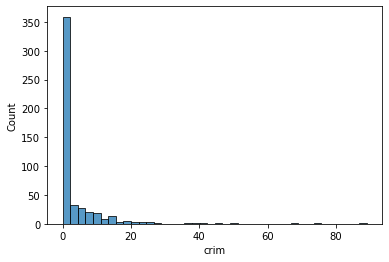

In [6]:
sns.histplot(boston[var], bins = 40)
plt.show()

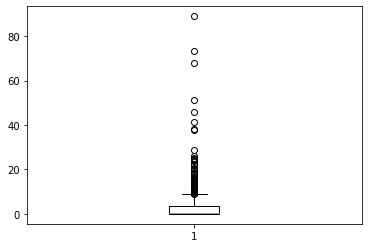

[0.082045 0.00632 ]
[3.6770825 8.98296  ]


In [7]:
box = plt.boxplot(boston[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(75%의 타운)의 범죄율이 3.6% 이하  
* boxlplot 기준으로 볼 때, 약 9% 이상은 이상치로 검토
* 대부분의 타운은 치안 관리가 잘 되는 것 같으나, 9% 이상의 범죄율 지역은 치안상태, 외곽지역, 슬럼가/빈곤층 밀집 지역 등인지 확인이 필요하다.

7) 추가 분석해 볼 사항이 있나요?

> * 범죄율을 9% 이상과 이하로 나누고(범주화), 이상인 지역과 이하의 지역에 대한 다른 변수의 차이를 비교해 본다.

### ② ptratio

In [8]:
var = 'ptratio'

1) 변수의 비즈니스 의미

> 학생/교사의 비율

2) 숫자, 범주?

> 비율이므로 숫자

3) NaN 존재 유무

In [9]:
boston[var].isnull().sum()

0

4) 기초통계량(수치화)

In [10]:
boston[var].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

5) 분포 확인(시각화)

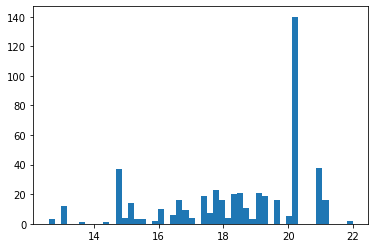

In [11]:
plt.hist(boston[var], bins = 50)
plt.show()

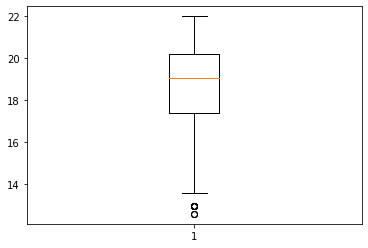

In [12]:
plt.boxplot(boston[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 비율이 14% 이하인 값은 boxplot을 기준으로 이상치에 가깝다.
> - 20%에 대다수의 값이 몰려있다.  
>     - %에 따라서 집값의 상관 여부를 분석해보겠다.
> - 왜 20%가 유난히 많은지 boston의 주변 학교, 학원 등의 교육시설의 분포도를 조사해보고 싶다.
    - %가 높을수록 집값이 높을것이다.

7) 추가 분석해 볼 사항이 있나요?

> 교사의 비율이 높을수록 범죄율은 낮을것이다. 또한 직업센터와의 거리는 가까울 것으로 추정, 다른 요인과 비교해볼 것이다.

### ③ lstat

In [13]:
var =  'lstat'

1) 변수의 비즈니스 의미

> 인구중 하위계층의 비율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [14]:
boston[var].isnull().sum()

0

4) 기초통계량(수치화)

In [15]:
boston[var].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

5) 분포 확인(시각화)

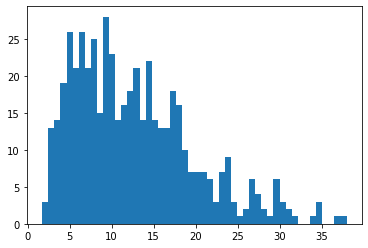

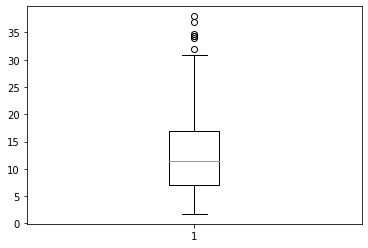

In [16]:
plt.hist(boston[var], bins = 50)
plt.show()
plt.boxplot(boston[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 1사부위 ~ 3사부위 의 값이 16% 근처에 형성되어있다. 데이터가 좌편향 되어있으므로 boston의 대다수 도시는 빈곤층의 비율이 낮다고 추측된다.
> - boxplot의 기준으로 30%를 초과하는 값은 이상치로 생각하겠다.
    - 대부분의 도시가 잘삼에도 불구하고 슬럼가가 존재할 것으로 추측된다.
    - 30% 이상의 빈곤층을 가진 대상으로 앞서 살펴본 crim과의 연관성에 대해서 분석해볼것이다.
        - 양의 상관관계가 나올것이라 추측된다.

7) 추가 분석해 볼 사항이 있나요?

> - 빈곤층이 낮을수록 사회에 참여하는 계층이 높을것이라 추측된다. 재산세율 등의 연관성에 대해 비교해보자

### ④ medv

In [17]:
var = 'medv'

1) 변수의 비즈니스 의미

> town별 집값을 나타내며, median값을 나타낸다.

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [18]:
boston[var].isnull().sum()

0

4) 기초통계량(수치화)

In [19]:
boston[var].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

5) 분포 확인(시각화)

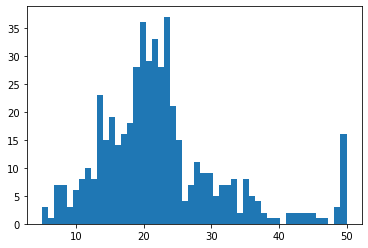

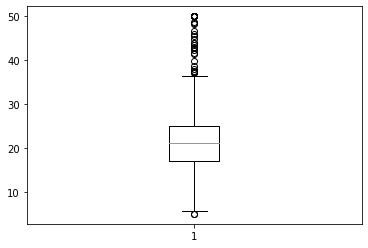

[17.025  5.6  ]
[25.  36.5]


In [20]:
plt.hist(boston[var], bins = 50)
plt.show()
box = plt.boxplot(boston[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 보스턴 집값은 대부분 17000~25000달러에 설정되어있다.
> - 그러나 일부 50000달러 이상의 데이터의 양이 많이 측정되는데, 이는 이상치로 보기 어렵다.
>    - 50000달러에 대한 집값의 결정요인이 무엇인지, 해당 target만을 떼어 다른 변수들을 활용하여 비교분석해볼것이다.

7) 추가 분석해 볼 사항이 있나요?

> 다른 요인들과 집값의 양의 상관관계를 그리는 변수가 존재하는지 확인해볼것이다.

# 범주형 변수

## 타이타닉 탑승객 데이터

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [21]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ① Survived

In [22]:
var = 'Survived'

1) 변수의 비즈니스 의미

> 탑승객의 생존여부

2) 숫자, 범주?

In [23]:
titanic[var].unique()

array([0, 1], dtype=int64)

> * 범주형 데이터
* 범주 종류 1, 0
    * 1: 생존
    * 0: 사망

3) NaN 존재 유무

In [24]:
titanic[var].isna().sum()

0

> NA 없음

4) 기초통계량(수치화)

In [26]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


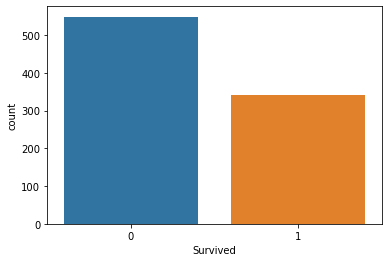

In [27]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 생존자
    * 생존자의 수는 342명
    * 생존율 0.384
* 사망율이 높은 이유는 무엇일까?

7) 추가 분석해 볼 사항이 있나요?

> * Survived가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② Pclass	

In [28]:
var = 'Pclass'

1) 변수의 비즈니스 의미

> 몇등급의 티켓을 발급하였는가?

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [29]:
titanic[var].isnull().sum()

0

4) 기초통계량(수치화)

In [30]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/len(titanic[var]))

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


5) 분포 확인(시각화)

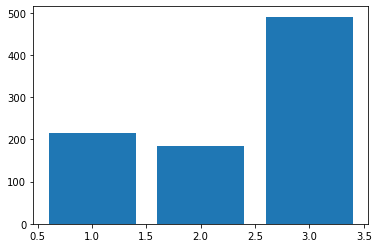

In [31]:
tmp = titanic[var].value_counts()
plt.bar(tmp.index, tmp.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>- 대부분의 승객은 3등급 클래스를 이용하였다.
>    - 이는 미국으로 이동하려는 사람이 대다수 탑승했다고 추측된다.
>- 1등급의 고객은 전체의 24%를 차지했다.

7) 추가 분석해 볼 사항이 있나요?

> 1등급의 손님들의 생존율과 관계가 있는지 파악할 것이다. 또, 1등급의 손님은 어떤 나이대와, 성별을 가졌는지 확인해볼 것이다.

### ③ Sex

In [32]:
var = 'Sex'

1) 변수의 비즈니스 의미

> 성별

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [33]:
titanic[var].isnull().sum()

0

4) 기초통계량(수치화)

In [34]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/len(titanic[var]))

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


5) 분포 확인(시각화)

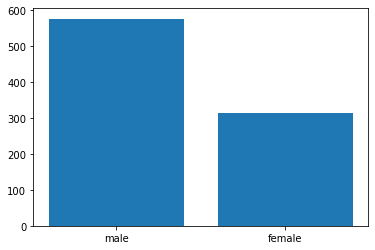

In [35]:
tmp = titanic[var].value_counts()
plt.bar(tmp.index, tmp.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대다수의 탑승객이 남자임을 알 수 있다  
> 당시 산업혁명이 활발했던 사우스햄튼 등 산업도시에서 고객들이 탄것으로 보아, 아메리칸 드림을 꿈꾸는 사람들이 대다수일 것이다.

7) 추가 분석해 볼 사항이 있나요?

> 성별에 따른 생존율을 분석해보겠다. 예상으로는 여성의 생존율이 더 높을것이라 추측된다.

### ④ Embarked

In [36]:
var = 'Embarked'

1) 변수의 비즈니스 의미

> 탑승지역

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [37]:
titanic[var].isnull().sum()

2

4) 기초통계량(수치화)

In [38]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/len(titanic[var]))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


5) 분포 확인(시각화)

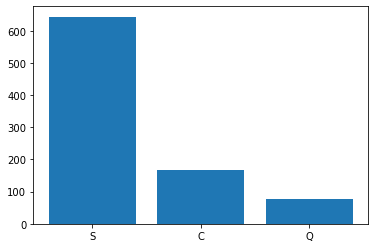

In [39]:
tmp = titanic[var].value_counts()
plt.bar(tmp.index, tmp.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 결측치가 2 존재한다. 이는 전체에 비해서 매우 미미한 숫자이므로 dropna를 진행하여 결과값을 분석해도 무방할 것이다.
> - 대다수의 사람이 사우스햄튼에서 탔다. 그러나 배가 침몰할 때 사우스햄튼사람이라고 먼저 구명조끼를 입거나 하지는 않았을 것이다.  
>때문에 생존율과의 상관관계는 의문이다.

7) 추가 분석해 볼 사항이 있나요?

> 사우스햄튼의 탑승객이 대다수이다. 사우스햄튼이 다른 도시에 비해서 번영했는지 추가적인 조사가 필요하다.
> - 도시별 클래스를 조사하여 해당 조사내용과 상관관계가 존재하는지 확인